### Step-1 Standard scalarization
### Step-2 Split data in train & test
### Step-3 Apply Linear Regression on split data
### Step-4 Lasso Regularization for Freature Selection
### Step-5 Ridge Regularization for Freature Selection

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [127]:
df =pd.read_csv(r"C:\Users\jites\OneDrive\Desktop\archive\house_price_regression_dataset.csv")
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


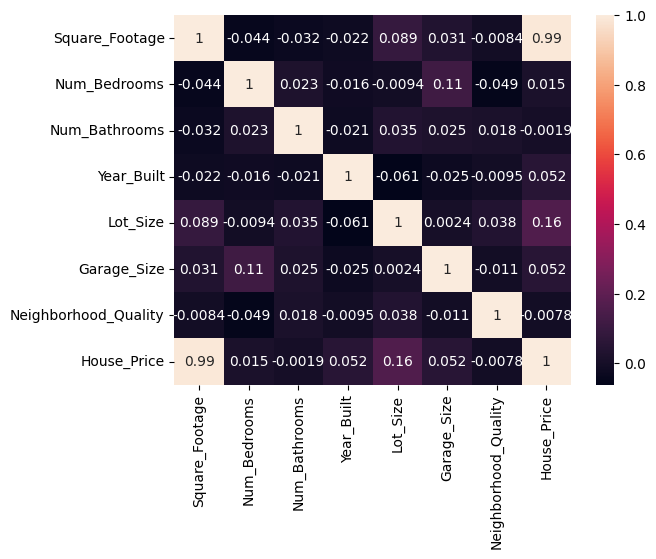

In [128]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [129]:
x= df.iloc[:,:-1]
y=df["House_Price"]

# Step-1 Standard scalarization

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
sc =StandardScaler()
sc.fit(x)
x =pd.DataFrame(sc.transform(x),columns=x.columns)

In [132]:
x.head()                  # all the Scale data replace with original data

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,-1.159803,-0.693836,-1.186699,-0.269122,-1.679278,-1.254658,-0.213126
1,1.160724,0.007008,1.252559,1.428045,1.522390,-0.027008,0.133420
2,0.618843,-1.394681,0.032930,1.428045,0.660422,-1.254658,1.173060
3,-1.473776,-1.394681,0.032930,-0.463084,-0.036555,-0.027008,0.826514
4,1.681887,-0.693836,-1.186699,0.312764,1.480809,-1.254658,0.826514


# Step-2 Split data in train & test

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.10,random_state=42)

In [135]:
x_train.shape ,y_train.shape

((900, 7), (900,))

# Step-3 Apply Linear Regression on split data

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error ,mean_squared_error
import numpy as np     # for Root mean_squared_error

In [137]:
lr = LinearRegression()

In [138]:
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

99.8399690295683

### Regression  cost function for Finding error values

In [154]:
print(mean_absolute_error(y_test,lr.predict(x_test)),"              ---->    mean_absolute_error")
print(mean_squared_error(y_test,lr.predict(x_test)),"            ---->    mean_square_error")
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))),"            ---->    Root mean_square_error")

8185.59541186144               ---->    mean_absolute_error
107493342.02799483             ---->    mean_square_error
10367.899595771307             ---->    Root mean_square_error


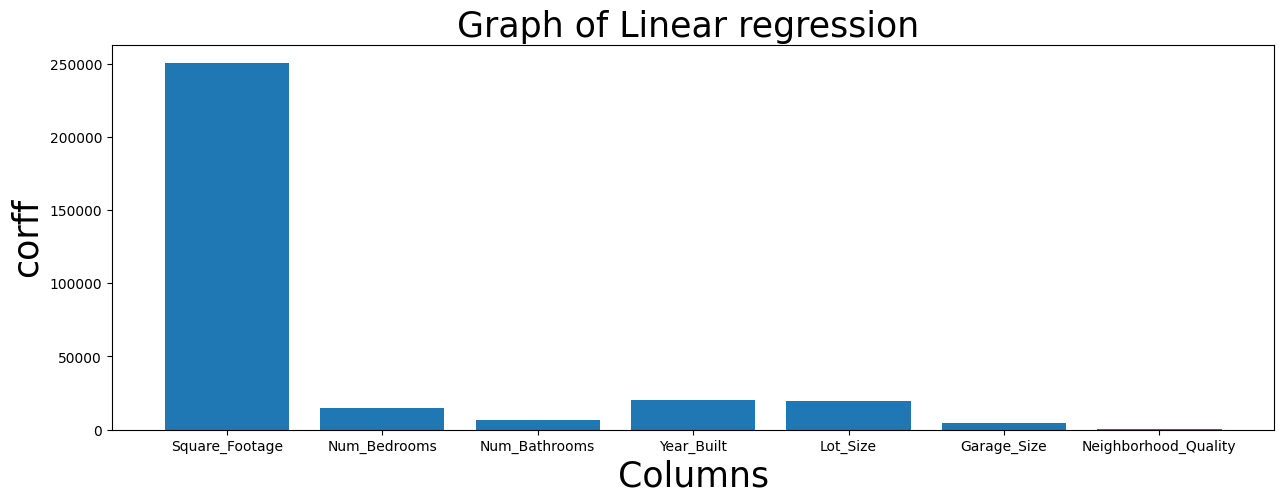

In [139]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("Graph of Linear regression ",size=25)
plt.xlabel("Columns",size=25)
plt.ylabel("corff",size=25)
plt.show()

# Step-4 Lasso Regularization for Freature Selection

In [107]:
from sklearn.linear_model import Lasso ,Ridge

In [114]:
lasso =Lasso(alpha=.1)
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)*100

99.83996836548398

### Regression  cost function for Finding error values

In [160]:
print(mean_absolute_error(y_test,lasso.predict(x_test)),"             ---->    mean_absolute_error")
print(mean_squared_error(y_test,lasso.predict(x_test)),"             ---->    mean_square_error")
print(np.sqrt(mean_squared_error(y_test,lasso.predict(x_test))),"               ---->    Root mean_square_error") 

8185.627631110151              ---->    mean_absolute_error
107493788.0956571              ---->    mean_square_error
10367.921107708                ---->    Root mean_square_error


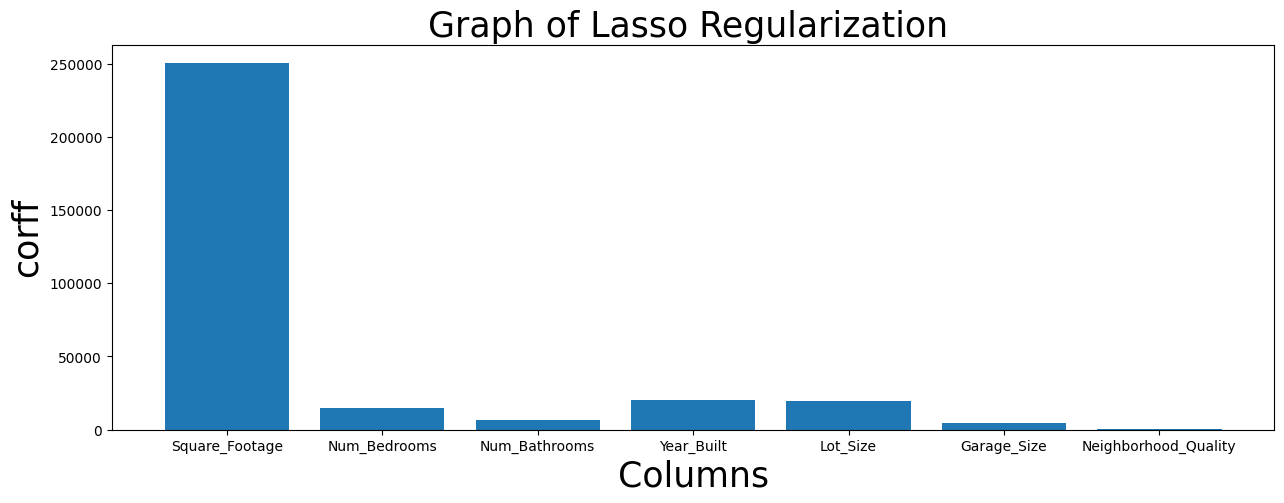

In [122]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lasso.coef_)
plt.title("Graph of Lasso Regularization ",size=25)
plt.xlabel("Columns",size=25)
plt.ylabel("corff",size=25)
plt.show()

# Step-5 Ridge Regularization for Freature Selection

In [117]:
ridge =Ridge(alpha=10)
ridge.fit(x_train,y_train)
ridge.score(x_test,y_test)*100

99.80604263576048

### Regression  cost function for Finding error values

In [161]:
print(mean_absolute_error(y_test,ridge.predict(x_test)),"             ---->    mean_absolute_error")
print(mean_squared_error(y_test,ridge.predict(x_test)),"             ---->    mean_square_error")
print(np.sqrt(mean_squared_error(y_test,ridge.predict(x_test))),"               ---->    Root mean_square_error") 

9129.854056248701              ---->    mean_absolute_error
130281815.05619587              ---->    mean_square_error
11414.105968326905                ---->    Root mean_square_error


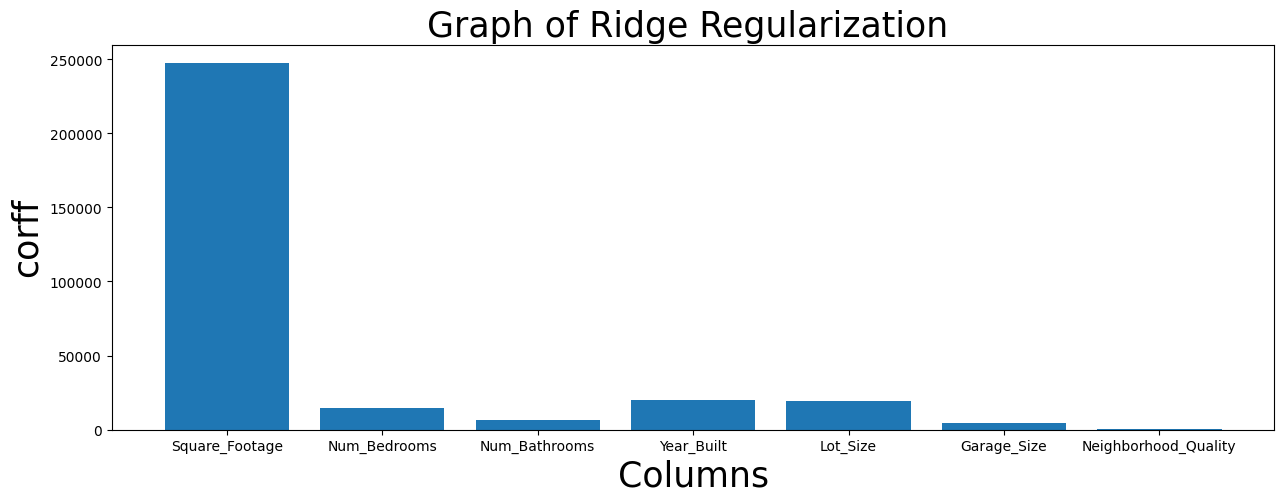

In [125]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ridge.coef_)
plt.title("Graph of Ridge Regularization ",size=25)
plt.xlabel("Columns",size=25)
plt.ylabel("corff",size=25)
plt.show()

# Step-5 Compersion the coefficient of Linear regression , Lasso , Ridge 

In [162]:
df = pd.DataFrame({"col_name":x.columns,"Linear regression":lr.coef_,"Lasso":lasso.coef_,"Ridge":ridge.coef_})
df

,col_name,Linear regression,Lasso,Ridge
0,Square_Footage,250403.439140,250403.289668,247601.231613
1,Num_Bedrooms,14632.959128,14632.847282,14338.876216
2,Num_Bathrooms,6799.987612,6799.876806,6608.364691
3,Year_Built,20421.451084,20421.350744,20111.159500
4,Lot_Size,19405.905955,19405.823864,19466.433498
5,Garage_Size,4169.844451,4169.763622,4267.705557
6,Neighborhood_Quality,232.173470,232.077168,211.656642
